# MHW05 Task 3 - Temperature
Температурный цикл в пригороде Лос-Анджелеса за 8 ноября показан в та- 
блице ниже. Приведены 24 наблюдения. 
(a) С помощью наброска процедуры примера 5.5 (используйте команду 
fmins) построите кривую f(x) = Acos(Bx) + Csin(Dx) методом наи- 
меньших квадратов для заданной совокупности данных. 
(b) Найдите ?2(/). 
(c) Постройте график кривой из п. (а), найденной методом наименьших 
квадратов, и нанесите данные в одной и той же системе координат. 


In [1]:
import numpy as np
import sympy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
#from sympy import cos, sin, summation, IndexedBase, Idx
#from math import cos, sin

In [2]:
# Input data
# Time
time = np.arange(1, 25)
# Degrees
degrees = np.array([58,58,58,58,57,57,57,58,60,64,67,68,66,66,65,64,63,63,62,61,60,60,59,58])
# length array
length_array = degrees.shape[0]

In [13]:
# Values A B C D by Least Square Method

def function(var,args):
    time,degrees = args
    return (var[0]*np.cos(var[1]*time) + var[2]*np.cos(var[3]*time) - degrees)

time = np.arange(1, 25)
degrees = np.array([58,58,58,58,57,57,57,58,60,64,67,68,66,66,65,64,63,63,62,61,60,60,59,58])

# initial values for A B C D
initial_var = np.array([1., 1., 1., 1.])

# Result for Least Square Method
result = leastsq(function,initial_var,args = [time,degrees])
print('  init A = ',initial_var[0],' A = ',result[0][0],'\n',\
      ' init B = ',initial_var[1],' B = ',result[0][1],'\n',\
      ' init C = ',initial_var[2],' C = ',result[0][2],'\n',\
      ' init D = ',initial_var[3],' D = ',result[0][3])

  init A =  1.0  A =  -5.775004731187633 
  init B =  1.0  B =  1.7298581649808826 
  init C =  1.0  C =  -8.238378490381972 
  init D =  1.0  D =  0.9635109173280776


In [14]:
# Input / Output function
def trig_function(time):
    return result[0][0]*np.cos(result[0][1]*time) + result[0][2]*np.cos(result[0][3]*time)
def trig_function_initail(time):
    return initial_var[0]*np.cos(initial_var[1]*time) + initial_var[2]*np.cos(initial_var[3]*time)

# E2 function
def E2(time, degrees):
    # Lenght
    time_length = time.shape[0] - 1
    # Under sum 
    under_sum = [np.sqrt((trig_function(time[i]) - degrees[i])**2) for i in np.arange(time_length)]
    # Sum 
    return np.sum(under_sum)/time_length

# Result 
E2_precision = E2(time, degrees)
print(E2_precision)

60.752886178937814


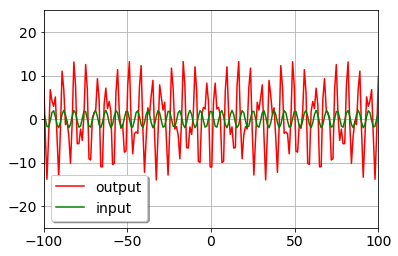

In [16]:
# Plot result
discrete_time = np.linspace(-100.0, 100.0, num=200)

fig, axs = plt.subplots()

axs.plot(discrete_time, trig_function(discrete_time),'r', label="output")
axs.plot(discrete_time, trig_function_initail(discrete_time),'g', label="input")
axs.set_xlim(-100, 100)
axs.set_ylim(-25, 25)
axs.grid(True)
legend = axs.legend(loc='best', shadow=True)

FONT_SIZE = 14
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure tit


plt.show()

In [6]:
# Doesnt use as input funtions is hard  to simlify

# # Values for sum of Least Square Method

# Var as a symbols
#i, j, n, x, y, A, B, C, D = sp.symbols('i, j, n, x, y, A, B, C, D')

# vector_for_sum = [np.sum((A*cos(B*time[k]) + C*sin(D*time[k]) - degrees[k])**2) for k in np.arange(length_array)]

# # Sum
# sum_of_vector = np.sum(vector_for_sum)
# print(np.sum(sum_of_vector))

# #initial value for minimize
# initial_values = np.array([1,1,1,1])